#Reto Final

Alejandro Hermosillo García 
<br>
Andrés Olvera Varela
<br>
Salvador Mendoza Tinoco
<br>
Ramiro 

### Importar librerías

In [ ]:
import pandas as pd 
import numpy as np 
import math 
import random
import seaborn as sns 
import matplotlib.pyplot as plt

### Funciones 

In [ ]:
def gen_Exp(l, t):
  lista1 = []
  U = np.random.uniform()
  if t%2 == 0:
    X = (-1/l) * math.log(U)
  else:
    X = (-1/l) * math.log(1-U)
  return X 

def gen_Ns(j):
  y = gen_Exp(1, j)
  u = random.random()
  fxcgx =  math.exp(-(y-1)**2/2)
  while u > fxcgx:
    y = gen_Exp(1, j)
    u = random.random()
    fxcgx =  math.exp(-(y-1)**2/2)
  return y

In [ ]:
def Geometric_Brownian():
  n = df.shape[0]
  ns = []
  for i in range(1, n+1):
    val = gen_Ns(i)
    val1 = val*((-1)**(i))
    ns.append(val1)
  df['Zi'] = ns

  XI = []
  for i in range(n):
    X = mu * h  - (sigma2b/2)*h + sigma*math.sqrt(h)*df['Zi'][i] 
    XI.append(X)  
  df['Xi'] = XI

  s_inicial = df['Tasa'][0]
  S_final = []
  for i in range (len(df)):
    suma = sum(XI[0:i+1])
    s = s_inicial * math.exp(suma)
    S_final.append(s)

  return S_final

### Lectura de base de datos y eliminación de datos nulos

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSV_XLSX/Tasas_Reto.xlsx', na_values = 'N/E')
df1

,t,Tasa
0,2021-10-10,NaN
1,2021-10-11,4.9850
2,2021-10-12,4.9862
3,2021-10-13,4.9825
4,2021-10-14,4.9857
...,...,...
359,2022-10-06,9.5515
360,2022-10-07,9.5451
361,2022-10-08,NaN
362,2022-10-09,NaN


In [ ]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
df1

,t,Tasa
0,2021-10-11,4.9850
1,2021-10-12,4.9862
2,2021-10-13,4.9825
3,2021-10-14,4.9857
4,2021-10-15,4.9806
...,...,...
249,2022-10-04,9.5366
250,2022-10-05,9.5453
251,2022-10-06,9.5515
252,2022-10-07,9.5451


In [ ]:
df1 = df1.iloc[:-1 , :]
df1

,t,Tasa
0,2021-10-11,4.9850
1,2021-10-12,4.9862
2,2021-10-13,4.9825
3,2021-10-14,4.9857
4,2021-10-15,4.9806
...,...,...
248,2022-10-03,9.5350
249,2022-10-04,9.5366
250,2022-10-05,9.5453
251,2022-10-06,9.5515


In [ ]:
df = df1.copy()
df

,t,Tasa
0,2021-10-11,4.9850
1,2021-10-12,4.9862
2,2021-10-13,4.9825
3,2021-10-14,4.9857
4,2021-10-15,4.9806
...,...,...
248,2022-10-03,9.5350
249,2022-10-04,9.5366
250,2022-10-05,9.5453
251,2022-10-06,9.5515


### Estimación de parámetros

In [ ]:
Xi = [0]
for i in range(1, len(df)):
  x = math.log(df.Tasa[i]) - math.log(df.Tasa[i-1])
  Xi.append(x) 

# Incrementos logarítmicos
df['Incrementos (ln)'] = Xi

# Media y varianza muestral
x_barra = df['Incrementos (ln)'].mean()
print(x_barra)
s_2 = df['Incrementos (ln)'].var()
print(s_2)

0.002567567313827649
0.0001396535700391873


In [ ]:
h = 1/253

# Miu y sigma 
mu = x_barra/h + s_2/2*h
sigma = math.sqrt(s_2)/math.sqrt(h)
print(mu)
print(sigma)

0.6495948063935929
0.1879690219688191


In [ ]:
# Sigma cuadrada
sigma2b = sigma**2
print(sigma2b)

0.035332353219914396


### Simulación de Movimiento Brownian Geométrico

#### Método de Montecarlo

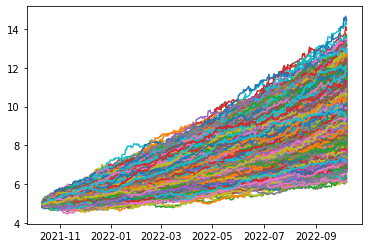

In [ ]:
Stf = []
for i in range(10000):
  S1 = Geometric_Brownian()
  plt.plot(df['t'], S1)
  Stf.append(S1[-1])

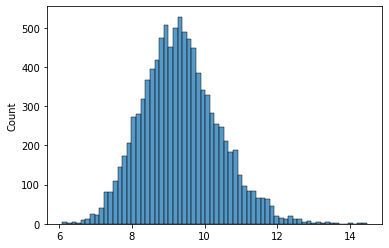

In [ ]:
sns.histplot(Stf)

In [ ]:
s = sum(Stf)/len(Stf)
s

9.339111190864658

### Opción Europea

In [ ]:
Libor = 0.34
r = math.log(1 + (Libor/100))
print(r)

0.003394233068015617


In [ ]:
K = input()
K = float(K)

sp = K + s

d1 = (math.log(sp/K) + (r + sigma2b/2))/sigma
d2 = d1 - sigma
print(sp)
print(d1)
print(d2)

100
109.33911119086466
0.5870349651859865
0.39906594321716743


In [ ]:
from scipy.stats import norm

Nd1 = (norm.cdf(d1))
Nd2 = (norm.cdf(d2))

C = sp * Nd1 - K*math.exp(-r)*Nd2
C

13.59251845550449